## Implementing XOR gate using neural network from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ [0,1],[1,0],[1,1],[0,0] ])
y= np.array([ [1],[1],[0],[0] ])

In [19]:
print(x.shape)
print(y.shape)

(4, 2)
(4, 1)


## Number of nodes in each layer

In [4]:
num_input=2
num_hidden=5
num_output=1

In [5]:
wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [6]:
print(wxh)
print(bh)

[[-0.05798719  0.00921505 -0.00218911  0.7409569   0.99086787]
 [-1.18701999 -0.57183024 -0.0961439  -1.50775283 -0.842676  ]]
[[0. 0. 0. 0. 0.]]


In [7]:
# Now initializing hidden to output layer weights
why = np.random.randn(num_hidden,num_output)
by = np.zeros((1,num_output))

In [8]:
# sigmoid activation function
def sigmoid(z)
    return 1/(1 + np.exp(-z))

In [9]:
# sigmoid derivative function
def sigmoid_derivative(z):
    return np.exp(-z)/((1 + np.exp(-z))**2)

In [10]:
# forward propogation function
def forward_propogation(x,wxh,why):
    z1 = np.dot(x,wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

In [11]:
#backward propogation
def backward_propogation(y_hat,z1,a1,z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dj_dwhy = np.dot(a1.T,delta2)
    delta1 = np.multiply(np.dot(delta2,why.T),sigmoid_derivative(z1))
    dj_dwhx = np.dot(x.T,delta1)
    return dj_dwhx,dj_dwhy

In [12]:
def cost_function(y,y_hat):
    j = 0.5*sum((y-y_hat)**2)
    return j

In [13]:
alpha = 0.01
num_iterations = 5000

In [14]:
# Now start training neural network
cost = []
for i in range(num_iterations):
    # implementing forward and backward propogation
    z1,a1,z2,y_hat = forward_propogation(x,wxh,why)
    dj_dwhx,dj_dwhy = backward_propogation(y_hat,z1,a1,z2)
    # updating weights
    wxh = wxh - alpha * dj_dwhx
    why = why - alpha * dj_dwhy
    # compute cost function
    c = cost_function(y,y_hat)
    cost.append(c)

Text(0, 0.5, 'Cost')

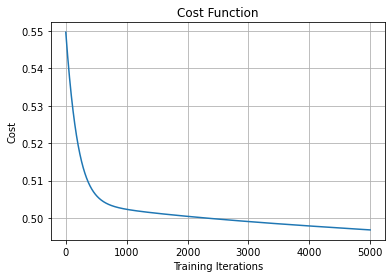

In [17]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')